<a href="https://colab.research.google.com/github/FaraazArsath/Akaike-Assignment/blob/main/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Structured Data Assignment - Problem 2**



**Importing packages**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

**Reading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_parquet('/content/gdrive/MyDrive/Structured_Data_Assignment /train.parquet')
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


**Identifying Patients taken 'Target Drug'**

In [ ]:
# Identifying patients who have taken 'TARGET_DRUG'
target_drug_patients = df[df['Incident'] == 'TARGET DRUG']
target_drug_patients

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG
...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG


In [ ]:
# Recording dates when 'TARGET_DRUG' was taken
target_drug_dates = target_drug_patients.groupby('Patient-Uid')['Date'].apply(list).reset_index()
target_drug_dates

,Patient-Uid,Date
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,"[2020-08-05 00:00:00, 2020-09-02 00:00:00, 202..."
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,"[2018-08-09 00:00:00, 2019-08-30 00:00:00, 201..."
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,"[2020-05-26 00:00:00, 2019-12-12 00:00:00, 201..."
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,"[2019-02-22 00:00:00, 2019-04-02 00:00:00, 201..."
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,"[2019-12-06 00:00:00, 2020-03-31 00:00:00, 202..."
...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,"[2020-08-05 00:00:00, 2020-06-16 00:00:00]"
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,[2020-07-18 00:00:00]
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,"[2020-06-17 00:00:00, 2020-08-11 00:00:00, 202..."
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,[2020-07-21 00:00:00]


**Analyzing Drop off Rates**

In [ ]:
# Creating a dataframe to determine duartion of 'Target Drug'
ideal_duration = pd.DateOffset(years=1) # Ideal treatment duration as per problem statement
target_drug_dates['Start_Date'] = target_drug_dates['Date'].apply(lambda x: min(x))
target_drug_dates['End_Date'] = target_drug_dates['Date'].apply(lambda x: max(x) + ideal_duration)
target_drug_dates['Duration'] = target_drug_dates['End_Date'] - target_drug_dates['Start_Date']
target_drug_dates

,Patient-Uid,Date,Start_Date,End_Date,Duration
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,"[2020-08-05 00:00:00, 2020-09-02 00:00:00, 202...",2020-07-08,2021-09-02,421 days
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,"[2018-08-09 00:00:00, 2019-08-30 00:00:00, 201...",2018-04-24,2020-10-29,919 days
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,"[2020-05-26 00:00:00, 2019-12-12 00:00:00, 201...",2019-10-31,2021-05-26,573 days
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,"[2019-02-22 00:00:00, 2019-04-02 00:00:00, 201...",2018-04-05,2020-11-22,962 days
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,"[2019-12-06 00:00:00, 2020-03-31 00:00:00, 202...",2019-09-10,2021-07-14,673 days
...,...,...,...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,"[2020-08-05 00:00:00, 2020-06-16 00:00:00]",2020-06-16,2021-08-05,415 days
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,[2020-07-18 00:00:00],2020-07-18,2021-07-18,365 days
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,"[2020-06-17 00:00:00, 2020-08-11 00:00:00, 202...",2020-05-21,2021-08-11,447 days
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,[2020-07-21 00:00:00],2020-07-21,2021-07-21,365 days


In [ ]:
dropoff_cases = target_drug_dates[target_drug_dates['Duration'] != ideal_duration]
dropoff_cases

,Patient-Uid,Date,Start_Date,End_Date,Duration
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,"[2020-08-05 00:00:00, 2020-09-02 00:00:00, 202...",2020-07-08,2021-09-02,421 days
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,"[2018-08-09 00:00:00, 2019-08-30 00:00:00, 201...",2018-04-24,2020-10-29,919 days
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,"[2020-05-26 00:00:00, 2019-12-12 00:00:00, 201...",2019-10-31,2021-05-26,573 days
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,"[2019-02-22 00:00:00, 2019-04-02 00:00:00, 201...",2018-04-05,2020-11-22,962 days
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,"[2019-12-06 00:00:00, 2020-03-31 00:00:00, 202...",2019-09-10,2021-07-14,673 days
...,...,...,...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,"[2020-08-05 00:00:00, 2020-06-16 00:00:00]",2020-06-16,2021-08-05,415 days
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,[2020-07-18 00:00:00],2020-07-18,2021-07-18,365 days
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,"[2020-06-17 00:00:00, 2020-08-11 00:00:00, 202...",2020-05-21,2021-08-11,447 days
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,[2020-07-21 00:00:00],2020-07-21,2021-07-21,365 days


In [ ]:
# Computing drop-off rates per month
dropoff_cases['Month'] = dropoff_cases['Start_Date'].dt.to_period('M')
dropoff_cases

,Patient-Uid,Date,Start_Date,End_Date,Duration,Month
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,"[2020-08-05 00:00:00, 2020-09-02 00:00:00, 202...",2020-07-08,2021-09-02,421 days,2020-07
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,"[2018-08-09 00:00:00, 2019-08-30 00:00:00, 201...",2018-04-24,2020-10-29,919 days,2018-04
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,"[2020-05-26 00:00:00, 2019-12-12 00:00:00, 201...",2019-10-31,2021-05-26,573 days,2019-10
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,"[2019-02-22 00:00:00, 2019-04-02 00:00:00, 201...",2018-04-05,2020-11-22,962 days,2018-04
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,"[2019-12-06 00:00:00, 2020-03-31 00:00:00, 202...",2019-09-10,2021-07-14,673 days,2019-09
...,...,...,...,...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,"[2020-08-05 00:00:00, 2020-06-16 00:00:00]",2020-06-16,2021-08-05,415 days,2020-06
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,[2020-07-18 00:00:00],2020-07-18,2021-07-18,365 days,2020-07
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,"[2020-06-17 00:00:00, 2020-08-11 00:00:00, 202...",2020-05-21,2021-08-11,447 days,2020-05
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,[2020-07-21 00:00:00],2020-07-21,2021-07-21,365 days,2020-07


In [ ]:
dropoff_rate = dropoff_cases.groupby('Month').size()
dropoff_rate

Month
2017-02      1
2017-03      2
2017-04      1
2017-05      5
2017-06      8
2017-07      2
2017-08      8
2017-09      4
2017-10      4
2017-11      3
2017-12     12
2018-01      9
2018-02     13
2018-03    453
2018-04    522
2018-05    499
2018-06    450
2018-07    349
2018-08    383
2018-09    319
2018-10    333
2018-11    312
2018-12    304
2019-01    318
2019-02    236
2019-03    255
2019-04    350
2019-05    428
2019-06    327
2019-07    302
2019-08    288
2019-09    230
2019-10    325
2019-11    252
2019-12    279
2020-01    254
2020-02    225
2020-03    233
2020-04    293
2020-05    256
2020-06    258
2020-07    269
Freq: M, dtype: int64

**Visualizing Drop off rate for Target Drug**

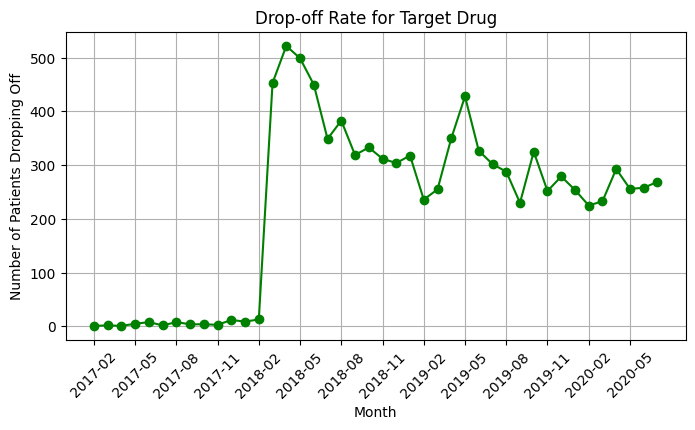

In [ ]:
dropoff_rate.index = dropoff_rate.index.strftime('%Y-%m')

plt.figure(figsize=(8, 4))
plt.plot(dropoff_rate.index, dropoff_rate.values, marker='o', linestyle='-',color='green')

plt.title('Drop-off Rate for Target Drug')
plt.xlabel('Month')
plt.ylabel('Number of Patients Dropping Off')
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(dropoff_rate.index[::3]) # displaying very third label for better spacing
plt.show()

**Visulaizing top events before drop-off of Target Drug**

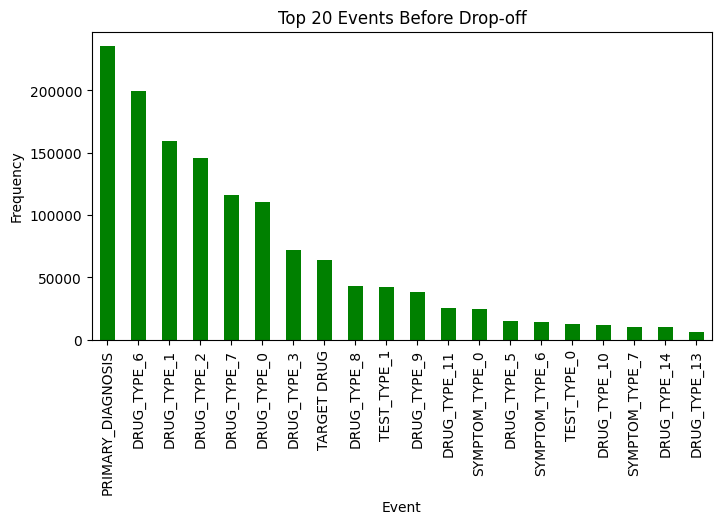

In [ ]:
events_before_dropoff = df[(df['Patient-Uid'].isin(dropoff_cases['Patient-Uid'])) & (df['Date'] <= dropoff_cases['Start_Date'].max())]
event_counts = events_before_dropoff['Incident'].value_counts()
plt.figure(figsize=(8, 4))
event_counts[:20].plot(kind='bar', color='green')
plt.title('Top 20 Events Before Drop-off')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()